# Applied Machine Learning HW 1 - cs3913

Package and Data Preparation

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('fire_nrt_V1_96617.csv')
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


### 1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):

1) Using the matplotlib defaults.

2) Adjusting alpha and marker size to compensate for overplotting.

3) Using a hexbin plot.

4) Subsampling the dataset.

In [52]:
# randomly sample 25% of data
sampled_data = data.sample(frac = 0.25)

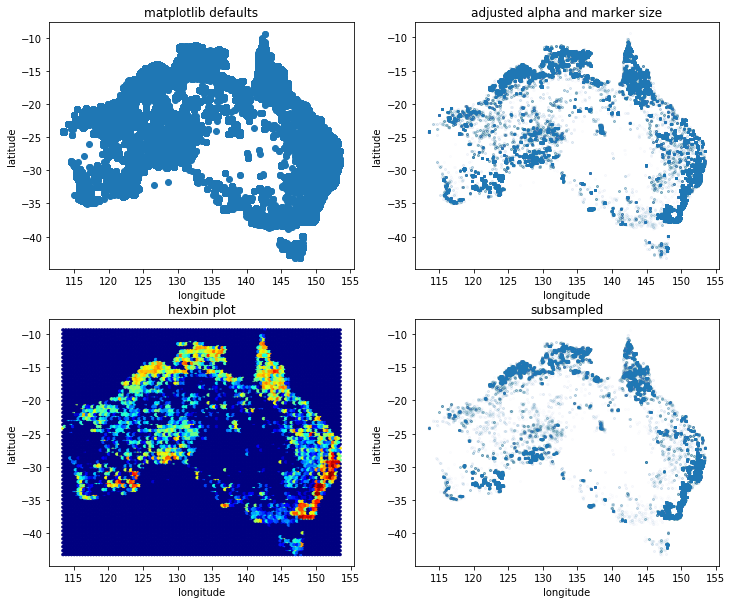

In [61]:
# create a 2*2 subplots
fig, axes = plt.subplots(2, 2, figsize = (12,10))

# matplotlib defaults.
axes[0,0].scatter(data.longitude, data.latitude)

# adjusting alpha and marker size to compensate for overplotting
axes[0,1].scatter(data.longitude, data.latitude, alpha = 0.01, s = 5)

# hexbin plot
axes[1,0].hexbin(data.longitude, data.latitude, bins='log', cmap = plt.cm.jet)

# subsampling the dataset
axes[1,1].scatter(sampled_data.longitude,sampled_data.latitude, alpha = 0.01, s = 5)

# add labels and titles
axes[0,0].set_xlabel('longitude')
axes[0,1].set_xlabel('longitude')
axes[1,0].set_xlabel('longitude')
axes[1,1].set_xlabel('longitude')
axes[0,0].set_ylabel('latitude')
axes[0,1].set_ylabel('latitude')
axes[1,0].set_ylabel('latitude')
axes[1,1].set_ylabel('latitude')
axes[0,0].set_title('matplotlib defaults')
axes[0,1].set_title('adjusted alpha and marker size')
axes[1,0].set_title('hexbin plot')
axes[1,1].set_title('subsampled')

plt.show()

### 1.2 In what areas are most of the anomalies (measurements) located?

- They mostly are located in eastern coast, northern territory and southern coasts of western australia.

## Task 2: Visualizing class membership

Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate settings). We are certain of a fire if this value is saturated.

### 2.1 Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs long for those points with brightness saturated and a separate for those who are not (within the same figure on separate axes). You can pick any of the methods from 1.1 that you find most suitable. Can you spot differences in the distributions?

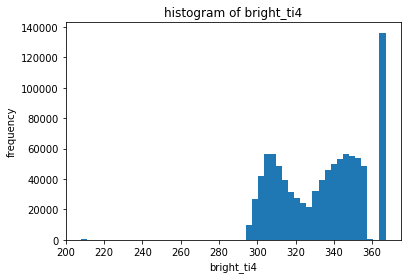

In [54]:
# histogram of 'bright_ti4'
plt.hist(data.bright_ti4, bins = 50)

plt.title('histogram of bright_ti4')
plt.xlabel('bright_ti4')
plt.ylabel('frequency')        
          
plt.show()

As shown in the histogram, the maximum of brightness has the highest value

In [55]:
# find the saturated brightness
data.bright_ti4.max()

367.0

In [21]:
# seperate dataset into 'saturated' and 'unsaturated'
saturated = data[data.bright_ti4==367]
unsaturated = data[data.confidence!=367]

In [22]:
# get longitude and latitude of saturated and unstaurated data
saturated_lgt = saturated.longitude
unsaturated_lgt = unsaturated.longitude
saturated_lat = saturated.latitude
unsaturated_lat = unsaturated.latitude

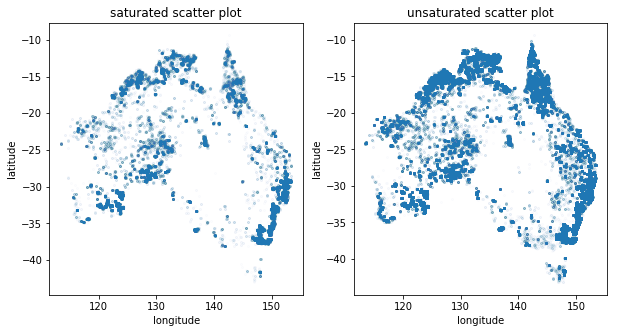

In [58]:
# seperately draw the scatter plot of saturated and unsaturated data
fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].scatter(saturated_lgt, saturated_lat, alpha = 0.01, s = 5)
axes[1].scatter(unsaturated_lgt, unsaturated_lat, alpha = 0.01, s = 5)

axes[0].set_xlabel('longitude')
axes[1].set_xlabel('longitude')
axes[0].set_ylabel('latitude')
axes[1].set_ylabel('latitude')

axes[0].set_title('saturated scatter plot')
axes[1].set_title('unsaturated scatter plot')

plt.show()

- Compared with saturated data, unsaturated data shows the similar distribution pattern, but has a relatively higher density.

### 2.2 Plot both groups in the same axes with different colors. Try changing the order of plotting the two classes (i.e. draw the saturated first then the non-saturated or the other way around). Make sure to include a legend. How does that impact the result?

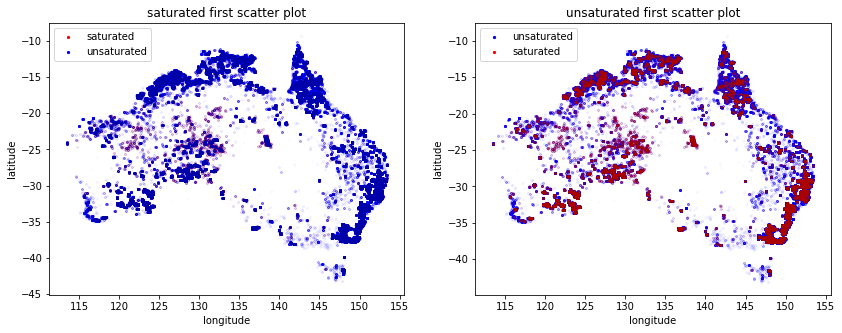

In [60]:
fig, axes = plt.subplots(1, 2, figsize = (14,5))

# the saturated first then the non-saturated
plot1 = axes[0].scatter(saturated_lgt, saturated_lat, c = 'r', alpha = 0.01, s = 5, label = 'saturated')
plot2 = axes[0].scatter(unsaturated_lgt, unsaturated_lat, c = 'b', alpha = 0.01, s = 5, label = 'unsaturated')
axes[0].set_xlabel("longitude")
axes[0].set_ylabel("latitude")
axes[0].set_title('saturated first scatter plot')
leg = axes[0].legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

# the unsaturated first then the saturated
plot1 = axes[1].scatter(unsaturated_lgt, unsaturated_lat, c = 'b', alpha = 0.01, s = 5, label = 'unsaturated')
plot2 = axes[1].scatter(saturated_lgt, saturated_lat, c = 'r', alpha = 0.01, s = 5, label = 'saturated')
axes[1].set_xlabel("longitude")
axes[1].set_ylabel("latitude")
axes[1].set_title('unsaturated first scatter plot')
leg = axes[1].legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

- If plotting saturated data first, they would mostly be covered by unsaturated data. As shown in the plot top right, it is mainly because both saturated and unsaturated data have similiar distribution pattern, and unsaturated data has a higher density

### 2.3 Can you find a better way to compare the two distributions?

#### 1-dimentional density plot

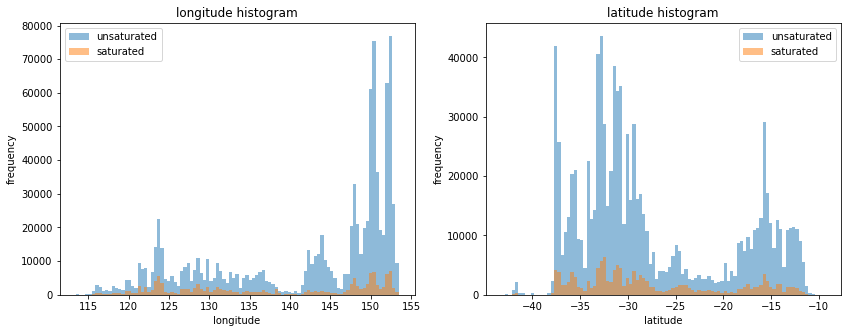

In [41]:
fig, axes = plt.subplots(1, 2, figsize = (14,5))

# draw longitude histogram
bins = np.linspace(np.min(data.longitude), np.max(data.longitude), 100)
axes[0].hist(unsaturated_lgt, bins, alpha=0.5, label='unsaturated')
axes[0].hist(saturated_lgt, bins, alpha=0.5, label='saturated')
axes[0].set_xlabel("longitude")
axes[0].set_ylabel("frequency")
axes[0].set_title('longitude histogram')
axes[0].legend(loc='upper left')

# draw latitude histogram
bins = np.linspace(np.min(data.latitude), np.max(data.latitude), 100)
axes[1].hist(unsaturated_lat, bins, alpha=0.5, label='unsaturated')
axes[1].hist(saturated_lat, bins, alpha=0.5, label='saturated')
axes[1].set_xlabel("latitude")
axes[1].set_ylabel("frequency")
axes[1].set_title('latitude histogram')
axes[1].legend(loc='upper right')

plt.show()

- First we draw the distribution of longitude and latitude seperately. As shown in the histogram, saturated data and unsaturated data have similar distribution, but unsaturated data has a higher density.

#### Two-dimentional Kernel Density Estimate Plot

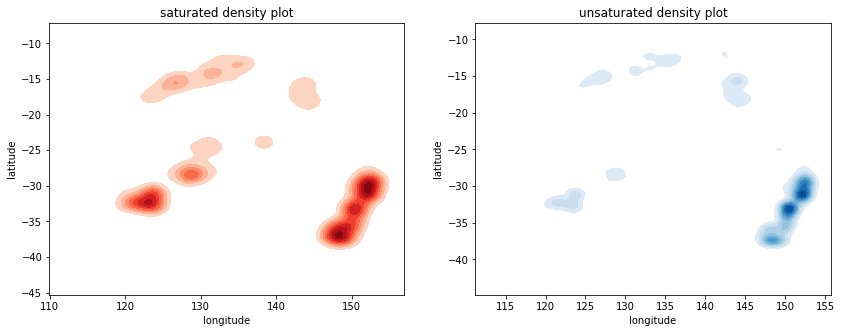

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (14,5))

# draw saturated density plot
plt.sca(axes[0])
sns.kdeplot(saturated_lgt,  
            saturated_lat, 
            color='r', shade=True, 
            cmap="Reds", shade_lowest=False) 
axes[0].set_xlabel("longitude")
axes[0].set_ylabel("latitude")
axes[0].set_title('saturated density plot')

# draw unsaturated density plot
plt.sca(axes[1])
sns.kdeplot(unsaturated_lgt,  
            unsaturated_lat, 
            color='b', shade=True, 
            cmap="Blues", shade_lowest=False) 
axes[1].set_xlabel("longitude")
axes[1].set_ylabel("latitude")
axes[1].set_title('unsaturated density plot')

plt.show()

- Then we try to draw a two-dimentional KDE plot. The KDE plot helps to show the relative density relation within a group and compare density between groups. As shown in the plot, both saturated and unsaturated data have the highest density lying along the eastern coasts. However, the density spread within the saturated group is wider than that of saturated group, and the density around southern coasts is higher to the rest parts(exclude eastern coasts) compared with what shows in the unsaturated group.